## Predicting Breast Cancer Type Using Decision Tree

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load data and split into train/test sets
X, y = load_breast_cancer(return_X_y=True)

# Select first 4 features
X = X[:,:4]

# Split dataset into training and evaluation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create and train model
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Serialize and Store trained model 

In [2]:
import joblib
joblib.dump(model, 'breastcancerpredictor.joblib')

['breastcancerpredictor.joblib']

In [3]:
import joblib
joblib.dump(model, 'breastcancerpredictor.z')

['breastcancerpredictor.z']

In [4]:
import joblib
joblib.dump(model, 'breastcancerpredictor.bin')

['breastcancerpredictor.bin']

#### It is strongly suggested noting down the Python version and the versions of the dependencies that were used to create the stored model, as they might be needed to deserialize it and use it while ensuring full compatibility. 

### Installing the Azure ML SDK

In [5]:
!pip install --upgrade azureml-sdk

     |████████████████████████████████| 102kB 611kB/s ta 0:00:01
     |████████████████████████████████| 2.0MB 1.4MB/s eta 0:00:01     |███████████████████████████████▊| 2.0MB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 184kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 799kB/s eta 0:00:01
     |████████████████████████████████| 8.6MB 1.1MB/s eta 0:00:01     |▌                               | 143kB 944kB/s eta 0:00:09     |██████████▏                     | 2.7MB 511kB/s eta 0:00:12
  Using cached https://files.pythonhosted.org/packages/07/cb/5f001272b6faeb23c1c9e0acc04d48eaaf5c862c17709d20e3469c6e0139/jmespath-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 143kB 784kB/s eta 0:00:01
     |████████████████████████████████| 153kB 765kB/s eta 0:00:01
     |████████████████████████████████| 552kB 843kB/s eta 0:00:01
     |████████████████████████████████| 972kB 1.0MB/s 

     |████████████████████████████████| 727kB 991kB/s eta 0:00:01
     |████████████████████████████████| 112kB 913kB/s eta 0:00:01
     |████████████████████████████████| 92kB 817kB/s eta 0:00:01
     |████████████████████████████████| 28.2MB 511kB/s eta 0:00:01    |█▎                              | 1.1MB 941kB/s eta 0:00:29     |██▍                             | 2.1MB 1.3MB/s eta 0:00:21     |█████                           | 4.3MB 715kB/s eta 0:00:34     |███████████████████▌            | 17.2MB 1.1MB/s eta 0:00:11     |███████████████████████████████▎| 27.5MB 822kB/s eta 0:00:01
     |████████████████████████████████| 17.5MB 1.2MB/s eta 0:00:01    |▌                               | 286kB 427kB/s eta 0:00:41     |██████████████████████████▉     | 14.6MB 1.3MB/s eta 0:00:03
     |████████████████████████████████| 61kB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 204kB 1.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f5

     |████████████████████████████████| 28.7MB 591kB/s eta 0:00:01    |█▏                              | 1.0MB 1.2MB/s eta 0:00:23     |███████▍                        | 6.7MB 1.5MB/s eta 0:00:15     |████████▌                       | 7.6MB 1.5MB/s eta 0:00:14     |██████████████▏                 | 12.7MB 2.2MB/s eta 0:00:08     |████████████████████▉           | 18.7MB 887kB/s eta 0:00:12     |████████████████████████▋       | 22.1MB 1.6MB/s eta 0:00:05     |█████████████████████████▎      | 22.7MB 1.6MB/s eta 0:00:04     |██████████████████████████████▏ | 27.0MB 552kB/s eta 0:00:04
     |████████████████████████████████| 92kB 687kB/s eta 0:00:01
     |████████████████████████████████| 7.9MB 686kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
     |████████████████████████████████| 122kB 769kB/s eta 0:00:01
     |████████████████████████████████| 51kB 1.0MB/s e

### OR using Azure Web Portal


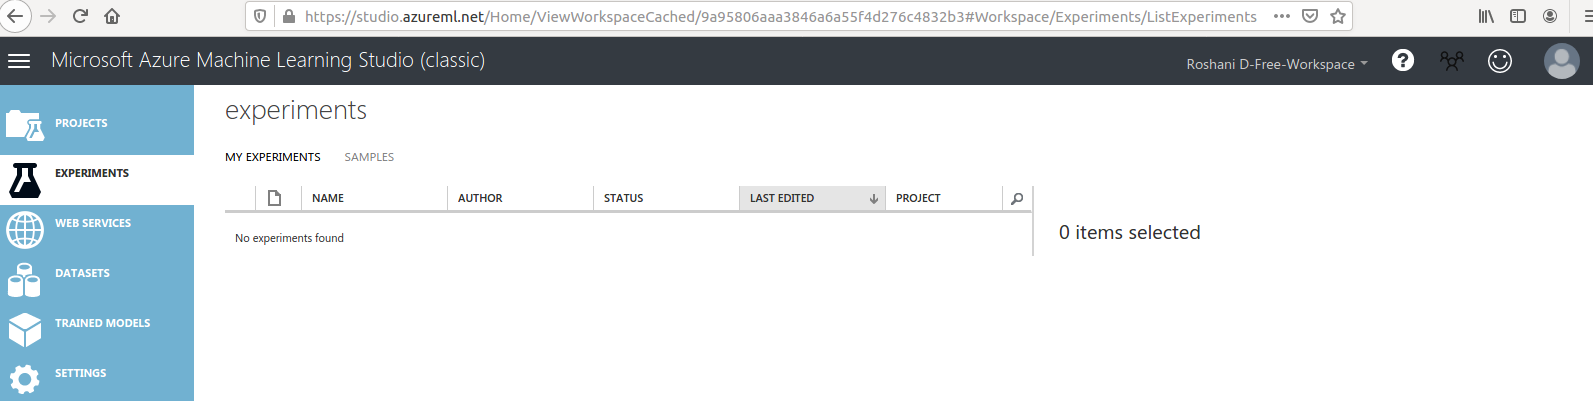

### Creating a workspace in Azure

In [ ]:
from azureml.core import Workspace

NAME = "aml-test-ws" # The name of the workspace to be created
RESOURCE_GROUP = "aml-test" # The name of the resource group that will contain the workspace
LOCATION = "westeurope" # The data center location to deploy to
SUBSCRIPTION_ID = "<your-subscription-id>" # GUID identifying the subscription with which to deploy

ws = Workspace.create(
    name=NAME,
    resource_group=RESOURCE_GROUP, 
    subscription_id=SUBSCRIPTION_ID,
    location=LOCATION,
    sku='basic', # Azure ML version (available: basic or enterprise)
    create_resource_group=True, # A new workspace will be created if it doesn't exist yet
    exist_ok=True, # The method succeeds if the workspace already exists
    show_output=True)

ws.write_config()

### Once the resource group and the workspace have been created, we can access the workspace through the Azure Machine Learning dashboard, at ml.azure.com.

Obtain the JSON file with the details of our workspace and subscription.

Within the Azure ML portal, on the upper-right corner navigation bar,

we click on Change subscription > Download config file, 

and place the file in our project directory. 

This config file can also be downloaded by navigating to the newly created workspace in the Azure portal

and clicking Download config file in the Overview page. 

### Registering the model

Go to the Models section on the left-side menu 

and click on Register model. 

We name our model, indicate the framework we used to train it (in this case, scikit-learn), 

and optionally write a description for additional metadata. 

We browse our machine to select and upload our serialized model file, 

and then we click on Register.

#### Using Python

In [ ]:
from azureml.core import Workspace
from azureml.core import Model

ws = Workspace.from_config()

model = Model.register(workspace = ws,
                       model_path ="breastcancerpredictor.joblib",
                       model_name = "breast_cancer_predictor",
                       model_framework=Model.Framework.SCIKITLEARN,
                       model_framework_version='0.22.2',
                       description = "Binary predictor for breast cancer on cell nuclei, \
                                    trained on the Wisconsin Breast Cancer Database")

## Verify that our model has been registered under the Models section.

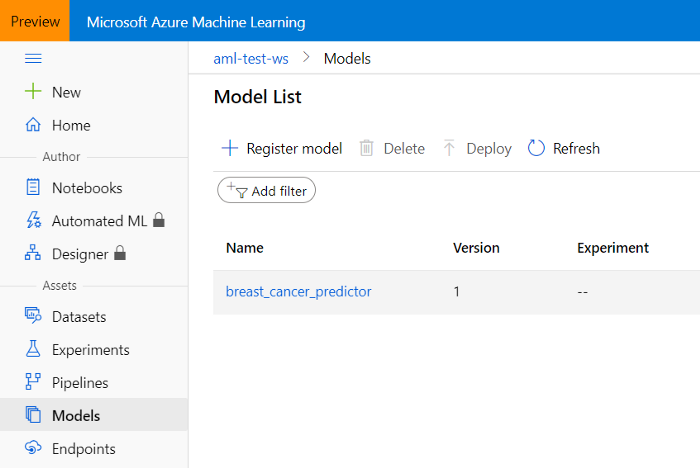

## Deploying the model

Our deployed web service will take the same input data as our trained model (in this case, an array of four floating numbers denoting our four selected features), and will output the prediction (here, 1 for benign and 0 for malignant).

Locate our registered model in the workspace, 

and make use of the deploy() method from the Model class, 

providing a name for our web service and the pointer to the model:

In [ ]:
from azureml.core import Workspace
from azureml.core.model import Model

model_name = "breast-cancer-predictor"
endpoint_name = "breast-cancer-predictor-ep"

ws = Workspace.from_config()

# Locate the model in the workspace
model = Model(ws, name=model_name)

# Deploy the model as a real-time endpoint
service = Model.deploy(ws, endpoint_name, [model])

# Wait for the model deployment to complete
service.wait_for_deployment(show_output=True)

### Model will be deployed in an ACI (Azure Container Instance). ACIs in Azure Machine Learning are meant to be used for development and testing purposes, as they only support low-scale workloads on CPUs.

### Our web service will now appear in the Azure Machine Learning portal, under the Endpoints section. There, we can obtain its REST endpoint’s URI and send some test POST requests to the API, to verify that the deployment was successful. The JSON-formatted input expected by this web service is the following:

{
    "data" : [ <feature-value1>, <feature-value2>, <feature-value3>, <feature-value4> ],
    "method": "predict"
}

### When sending two samples from the split evaluation dataset (for instance, via Postman), we see that we obtain the expected predictions (the first sample corresponds to a benign tumor, and the second to a malignant one):

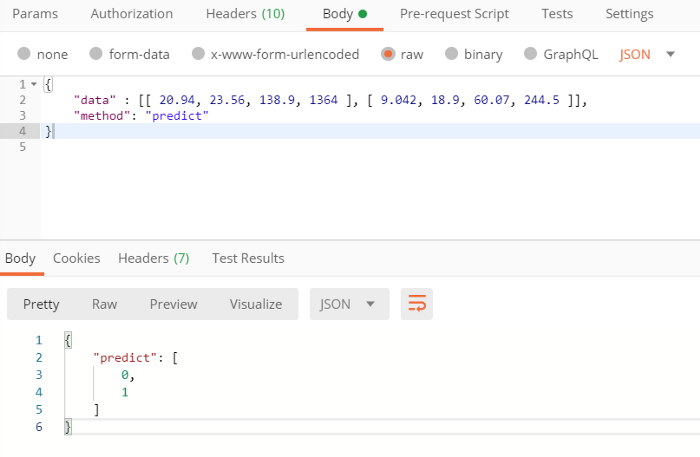

In [ ]:
import json
import requests

input_array = [ 9.042, 18.9, 60.07, 244.5 ]
scoring_uri = "<web-service-uri>"

# Add the 'data' field
data = { "data" : input_array, 
        "method" : "predict"} # Write it in the required format for the REST API

input_data = json.dumps(data) # Convert to JSON string

# Set the content type to JSON
headers = {"Content-Type": "application/json"}

# Make the request and display the response
resp = requests.post(scoring_uri, input_data, headers=headers)

# Return the model output
result = json.loads(resp.text)

# 'result' will contain the dictionary: {'predict': 1}

## Model is deployed in a compute instance with a predefined configuration (10% usage limit of a single CPU core and 0.5GB of RAM)

### What if this compute target setup does not provide enough computational power for our model?

### What if we might want to have more flexibility to define how the web service interfaces with external users: 
for instance, we may have to carry out additional operations on the input data before feeding it to the model,
such as normalizing the input features or dealing with missing values in some particular way.

### The entry script (also called scoring script) must contain the two following functions:

    
    init(): it is run a single time right when the Docker container hosting our web service is started, and it is generally used to load our registered model as a global object
    
    
    run(input_data): it is run every time the web service receives a request, and it is in charge of receiving the input data, sending it to the model, and returning the model’s response

In [ ]:
#score.py
import joblib
import os
import json
import numpy as np

from azureml.core import Run
from azureml.core.model import Model


# The init() method is called once, when the web service starts up.
def init():
    """
    Initialize the scoring script
    """
    global model, run

    # Locate the model in Azure Machine Learning
    model_artifact = "breastcancerpredictor.joblib"
    model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), model_artifact)
    # AZUREML_MODEL_DIR is an environment variable created during deployment,
    # indicating the path to the folder containing the registerd moedels
    # (./azureml-models/$MODEL_NAME/$VERSION)

    # Load the model
    model = joblib.load(model_path)


# The run() method is called each time a request is made to the scoring API.
def run(data):
    """
    Make predictions
    """

    # Extract the input data from the request
    # (we expect it to be a 2D array, where every row
    # is a different sample for the model to process)
    input_data = json.loads(data)['data']

    # Run the model on the input data
    output = model.predict(np.array(input_data))

    # Prepare the results as a dictionary,
    # so that it can be JSON-serialized
    # (as the returned data needs to be JSON-serializable)
    result = {"isMalignant" : output.tolist()}

    return result

### The other parameter we need for our inference configuration is an execution environment. We can create an Environment object, give it a name, and indicate the Conda or pip dependencies that we want to have installed. Note that the azureml-defaults package is always required for the model to be hosted as a web service.

In [ ]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

environment = Environment("my-custom-environment")

environment.python.conda_dependencies = CondaDependencies.create(pip_packages=[
    'azureml-defaults>= 1.0.45', # mandatory dependency, contains the functionality needed to host the model as a web service
    'inference-schema[numpy-support]', # dependency for automatic schema generation (for parsing and validating input data)
    'joblib',
    'numpy',
    'scikit-learn'
])


## Inference Configuration

In [ ]:
from azureml.core.model import InferenceConfig

inference_config = InferenceConfig(entry_script="score.py", environment=environment)

## Deployment configuration

compute instance with one CPU core and 2GB of RAM:

In [ ]:
# [Environment object and inference configuration have been previously defined]

from azureml.core.webservice import AciWebservice

aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=2)

Now provide both configuration objects to the deploy() method

In [ ]:
# [Environment object, inference configuration and deployment configuration have been previously defined]

from azureml.core import Workspace
from azureml.core.model import Model

model_name = "breast-cancer-predictor"
endpoint_name = "breast-cancer-predictor-ep"

ws = Workspace.from_config()

model = Model(ws, name=model_name)

service = Model.deploy(workspace=ws,
                       name=endpoint_name,
                       models=[model],
                       inference_config=inference_config,
                       deployment_config=aci_config)

service.wait_for_deployment(show_output=True)

Now run it to deploy our new web service, which we can send requests to by simply providing our input data:

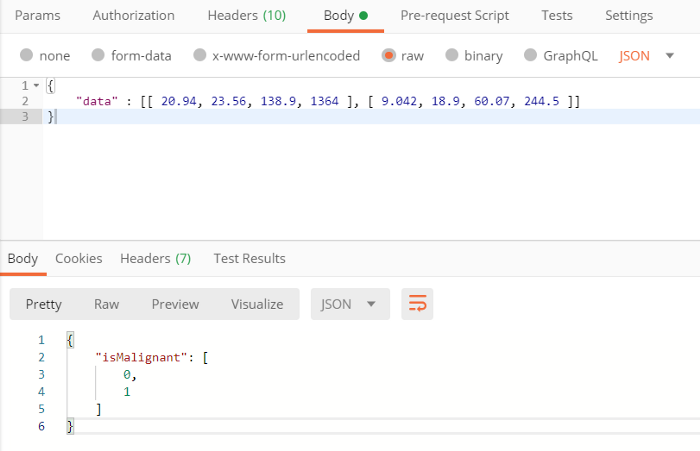

Refrences:
    https://towardsdatascience.com/how-to-deploy-a-machine-learning-model-to-the-cloud-in-less-than-5-minutes-1811fb6aef3e